
# a) Find the conformal mapping
The Joukowski transform $g(\zeta)=\frac{1}{2}(\zeta+\frac{1}{\zeta})$ maps the region $|\zeta|<1$ in the $\zeta$-plane to the region outside a finite plate $-1<Re(z')<1, Im(z')=0$ in the $z'$-plane, as we had discussed in lectures. We write this as $z' = \frac{1}{2}(\zeta+\frac{1}{\zeta})$.

We then take the inverse of $z'$ and write $z=\frac{1}{z'}$. The finite plate now maps to an infinite wall along the real axis with a gap $-1<Re(z)<1, Im(z)=0$ in the $z$-plane. 

These two transformations together give the answer to the question:

\begin{equation} \frac{1}{z} = \frac{1}{2}(\zeta+\frac{1}{\zeta}) \tag{1} \end{equation}

\begin{equation} z =f(\zeta)=\frac{2\zeta}{\zeta^2+1} \tag{2} \end{equation}






# b) Find the inverse mapping to a)
Rewrite $(2)$ as 
\begin{equation} z\zeta^2-2\zeta+z=0 \tag{3} \end{equation}

Solution using the well-known formula for solving quadratic equations:
\begin{equation} \zeta = \frac{2\pm \sqrt{4-4z^2}}{2z} \tag{4} \end{equation}
\begin{equation} \zeta = \frac{1- \sqrt{1-z^2}}{z} \tag{5} \end{equation}
The negative square root is taken to ensure the image of the origin in the $z$-plane is inside the unit disc in $\zeta$-plane.



# c) Complex potential due to a point vortex

The complex potential due to a point vortex at $\zeta_a$ inside the unit disc is well-known.

\begin{equation} w(\zeta) = G_0(\zeta,\zeta_a)=\frac{-i\Gamma}{2\pi}log(\frac{\zeta-\zeta_a}{|\zeta_a|(\zeta-(\bar{\zeta})^{-1})}) \tag{6} \end{equation}

where $\Gamma$ is the circulation and $\bar{\zeta}$ is the complex conjugate of $\zeta$.

Substituting (Eq.5) into (Eq.6) give the complex potential $w(z)$ in the $z$-plane explicitly in $z$. One can do this because of conformal invariance. This step is not necessary.

We can visualise the streamlines due to this point vortex:

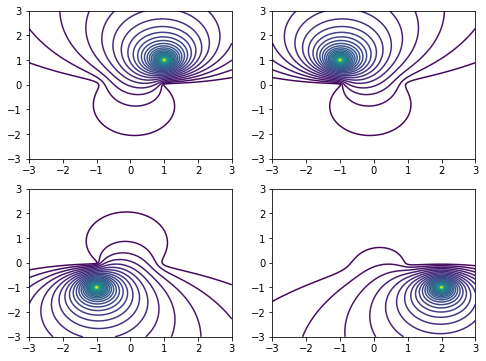

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def w(z, za, gamma=1):
    '''
    vortex potential in z-plane
    '''
    zeta = (1-(1-z**2)**.5)/z
    zeta_a = (1-(1-za**2)**.5)/za

    zetaa_mol = np.absolute(zeta_a)
    zetaa_ = np.conj(zeta_a)

    return gamma *-1j/2./np.pi*np.log((zeta-zeta_a)/zetaa_mol/(zeta-1./zetaa_))

# Construct 2d coordinates for streamline computation
node_number = 600
edge = 3
x, y = np.meshgrid( np.linspace(-edge, edge, node_number), np.linspace(-edge, edge, node_number) )
z = x + 1j*y

# Plot
fig = plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
w1 = plt.contour(x, y, w(z, 1+1j).imag, levels=60)
plt.subplot(2,2,2)
w2 = plt.contour(x, y, w(z, -1+1j).imag, levels=60)
plt.subplot(2,2,3)
w3 = plt.contour(x, y, w(z, -1-1j).imag, levels=60)
plt.subplot(2,2,4)
w4 = plt.contour(x, y, w(z, 2-1j).imag, levels=60)

# d) Trajectory of a single point vortex

The Hamiltonian for the point vortex in the $\zeta$-plane is given by:

\begin{equation} H^{(\zeta)}(\zeta_a)=Im[\Gamma W_B(\zeta_a,t)]+\frac{\Gamma^2}{2}Im[g(\zeta_a,\zeta_a)] \tag{7} \end{equation}

where $W_B$ is the complex potential for background flow and $g$ is an analytic function defined from the expression:

\begin{equation} G_0(\zeta,\zeta_a)=\frac{-i}{2\pi}log(\zeta-\zeta_a) + g(\zeta,\zeta_a) \tag{8}\end{equation}

In this case,


\begin{align}
g(\zeta,\zeta_a) &= \frac{i}{2\pi}log(|\zeta_a|(\zeta-(\bar{\zeta})^{-1})) \tag{9} \\
W_B&=0
\end{align}


Compute $H^{(\zeta)}(\zeta_a)$ using (Eq.9):
\begin{align}
H^{(\zeta)}(\zeta_a)&=\frac{\Gamma^2}{2}Im[\frac{i}{2\pi}log(|\zeta_a|(\zeta_a-(\bar{\zeta_a})^{-1}))] \\
H^{(\zeta)}(\zeta_a)&=\frac{\Gamma^2}{2}Re[\frac{1}{2\pi}log(|\zeta_a|(\zeta_a-(\bar{\zeta_a})^{-1}))] \\
H^{(\zeta)}(\zeta_a)&=\frac{\Gamma^2}{4\pi}log|(|\zeta_a|\frac{(\zeta_a\bar{\zeta_a}-1)}{\bar{\zeta_a}})| \\
H^{(\zeta)}(\zeta_a)&=\frac{\Gamma^2}{4\pi}log(|\zeta_a|\frac{|(\zeta_a\bar{\zeta_a}-1)|}{|\bar{\zeta_a}|}) \\
H^{(\zeta)}(\zeta_a)&=\frac{\Gamma^2}{4\pi}log(1-|\zeta_a|^2) \\
\tag{10}
\end{align}

The Hamiltonian function in the $z$-plane is given by the Kirchhoff-Routh path function:
\begin{align} H^{(z)}(z_a) = H^{(\zeta)}(\zeta_a) + \frac{\Gamma^2}{4\pi}log|f'(\zeta_a)| \tag{11}\end{align}

Compute $f'(\zeta_a)$ using (Eq.2):
\begin{align} f'(\zeta_a)=\frac{2-2\zeta_a^2}{(1+\zeta_a^2)^2} \tag{12} \end{align}

Substitute (Eq.10) and (Eq.12) into (Eq.11):

\begin{align}
H^{(z)}(z_a) &= \frac{\Gamma^2}{4\pi}log(1-|\zeta_a|^2) + \frac{\Gamma^2}{4\pi}log|\frac{2-2\zeta_a^2}{(1+\zeta_a^2)^2}| \\
H^{(z)}(z_a) &=\frac{\Gamma^2}{4\pi}log|(1-|\zeta_a|^2)\frac{2-2\zeta_a^2}{(1+\zeta_a^2)^2}| \\
\tag{13}
\end{align}


The Hamiltonian remains constant in time. Thus, the trajectories are given by 
\begin{align}
\frac{\Gamma^2}{4\pi}log|(1-|\zeta_a|^2)\frac{2-2\zeta_a^2}{(1+\zeta_a^2)^2}|=const. \\
\tag{14}
\end{align}
or 
\begin{align}
|(1-|\zeta_a|^2)\frac{2-2\zeta_a^2}{(1+\zeta_a^2)^2}|=const_2. \\
\tag{15}
\end{align}

Again, we can substitute (Eq.5) into the above the equations to obtain the trajectory function explicitly in $z$, but this is not necessary in computation.

We can plot the contours of the Hamiltonian in (Eq.13) to visualise the trajectories:

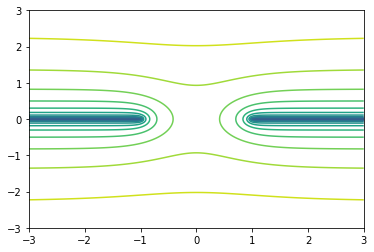

In [2]:
def Hamiltonian( z, gamma=1, m=1 ):
    '''
    Hamiltonian in z-plane
    '''
    zeta = (1-(1-z**2)**.5)/z
    zeta_mol = np.abs(zeta)

    return gamma**2/4/np.pi * np.log( (1-zeta_mol**2) )+ \
           gamma**2/4/np.pi * np.log( np.abs( (2-2*zeta**2) / (1+zeta**2)**2 ) )

H_c = plt.contour(x, y, Hamiltonian(z), levels=15)

# e) Critical height $h_{crit}$
From (Eq.5) we observe that $\zeta=f^{-1}(z)$ is an odd function in $z$.
From (Eq.13)-(Eq.15) the Hamiltonian is a function of $|\zeta_a|$ and $\zeta_a^2$, so it is even in $\zeta_a$.

We can then conclude that the trajectory function is an even function in $z_a$, i.e. the trajectories are symmetric about both x and y-axes.

With this information, if there exists a critical height, the trajectory associated with this height must pass through the origin.

When $z_a=0+0i$, the image is $\zeta_a=0+0i$ (This is the benefit of choosing the negative square root earlier).

Substitute $\zeta=0+0i$ into (Eq.14):

\begin{align}
\frac{\Gamma^2}{4\pi}log|(1-0)\frac{2-0}{(1+0)^2}|&=const. \\
const.&=\frac{\Gamma^2}{4\pi}log2
\tag{16}
\end{align}


The corresponding constant in (Eq.15) is $const_2=2$.

We can plot this specific contour of the Hamiltonian in (Eq.13):

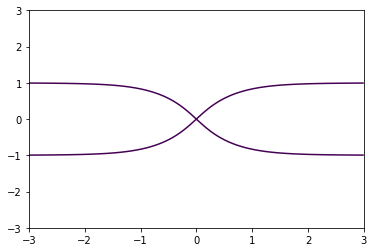

In [3]:
H_cc = plt.contour(x, y, Hamiltonian(z), [1./4./np.pi*np.log(2)])

The associated trajectory passes through the origin as expected.

The critical height $h_{crit}=1$ automatically appears in the plot.

# f) Mass flux complex potential
## Method 1: Mapping from the upper half plane to fluid region with a gap in a wall
Consider the mapping $z=g(\zeta')=\frac{1}{2}(\zeta'+\frac{1}{\zeta'})$ and the inverse $\zeta'=g^{-1}(z)=z-\sqrt{z^2-1}$.

We have seen previously the unit circle boundary $|\zeta|=1$ is mapped to a finite plate $-1<Re(z)<1, Im(z)=0$, and the fluid region in the upper semi-disc is mapped to the lower half z-plane. The rest of the upper half $\zeta'$-plane (region $D_1$ as shown in figure below) is mapped to the upper half z-plane by inspection. The gap $-1<Re(z)<1, Im(z)=0$ now corresponds to the line segment $S$ in the $\zeta$ plane. This is shown schematically below:
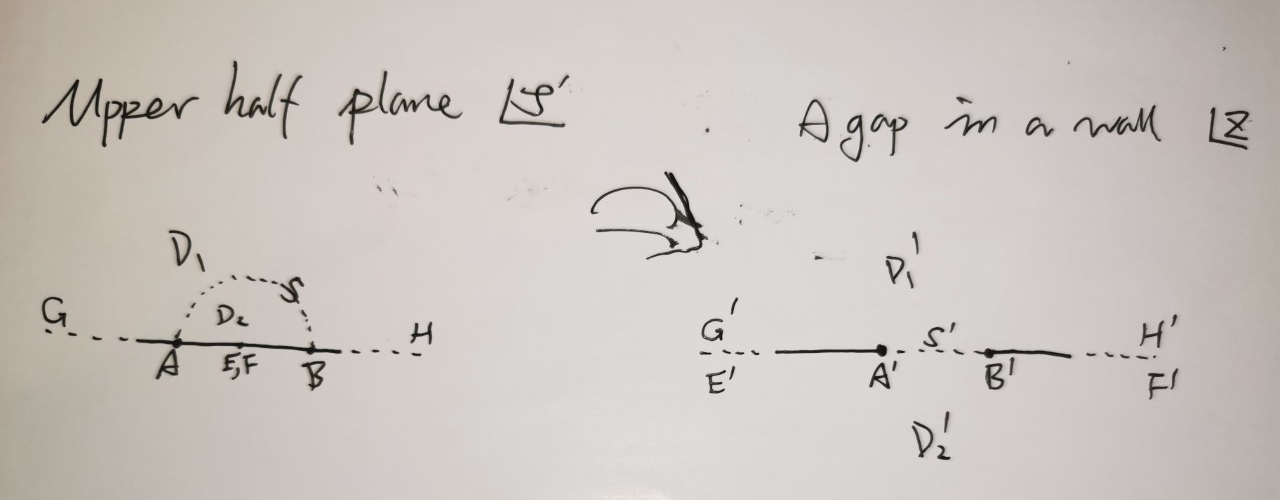

We conclude that $g(\zeta')$ maps the upper half $\zeta'$-plane to the fluid region outside the inifite wall with a gap in the $z$-plane.

This is useful to find the complex potential for the mass flux.

The streamlines for a mass flux must all go through the gap in only one direction, e.g. from up to down. In the mean time, the two infinite walls must be streamlines.

In other words, in the $\zeta'$-plane we want to find streamlines passing through the line segment $S$ in one direction and aligned along the real axis (the inifinite wall). One natural solution is to put a source or sink at the origin, i.e. $w(\zeta')=log(\zeta')$, whose imaginary part is $arg[\zeta']$ and has contours all going radially from the origin, as we can see below:

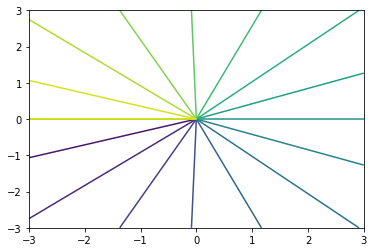

In [4]:
H_c_log = plt.contour(x, y, np.log(z).imag, levels=15)

Now we can write down the complex potential for a mass flux in $\zeta'$-plane:
\begin{align}
w_b(\zeta')=Alog(\zeta')
\tag{17}
\end{align}
where $A$ is a constant.

The mass flux between two streamlines are given by the difference of their heights, i.e. the values of streamfunction on the streamlines. Thus, the total mass flux through the line segment $S$ is given by $A(\pi-0)$. In this exercise, $m=-A(\pi-0)$. The minus sign is taken because the mass flux is from upper to lower region. We can determine the constant $A$ and write the complex potential in the $z$-plane using $\zeta'=g^{-1}(z)=z-\sqrt{z^2-1}$:

\begin{align}
w_b(\zeta')&=-\frac{m}{\pi}log(\zeta') \\
w_b(z)&=-\frac{m}{\pi}log(z-\sqrt{z^2-1})
\tag{18}
\end{align}


The combined complex potential due to a point vortex at $z_a$ and mass flux is simply the sum of the two:
\begin{align} \hat{w}(z)=w(z) + w_b(z) \tag{19} \end{align}
where $w(z)$ is given in (Eq.6).

We can visualise the streamline by plotting the imaginary part of $w_b(z)$ to justify our solution:


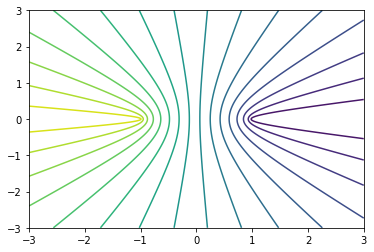

In [5]:
def wb( z, m=1 ):
    '''
    background complex potential in z plane
    '''
    return -m/np.pi * np.log(z-(z**2-1)**.5)

w_b = plt.contour(x, y, np.abs(wb(z).imag), levels=17)

## Method2:
Inspired by Prof.Crowdy on Monday:

We can put a source and a sink at $\zeta=i$ and $\zeta=-i$ respectively in the $\zeta$-plane. Those two points correspond to the infinities in the upper and lower half $z$-plane respectively. The streamlines go around the unit circle in the $\zeta$-plane, which corrsponds to the two walls in the $z$-plane. All streamlines go across the real axis in the $\zeta$ from upper region to lower region, and the the portion of real axis $-1<\zeta<1$ maps to the gap.

The complex potential in the $\zeta$-plane is :

\begin{align}
w_{b2}(\zeta)&=B(log(\zeta-i)-log(\zeta+i)) \\
\tag{20}
\end{align}

where $B$ is a real constant that depends on $m$. We compute $B$ by considering the values of streamfunction at $z=1+0j$ and $z=-1+0j$. The values of streamfunction on the two streamlines are:

\begin{align}
\Psi_1 &= Im[w_b(1)]=-\frac{1}{2}\pi \\
\Psi_2 &= Im[w_b(-1)]=-\frac{3}{2}\pi \\
\tag{21}
\end{align}

So $B$ is given by
\begin{align}
m&=\Psi_1-\Psi_2 \\
m&=B(-\frac{1}{2}\pi-(-\frac{3}{2}\pi)) \\
B&=\frac{m}{\pi}
\tag{22}
\end{align}

Again we could obtain $w_b(z)$ by substituting (Eq.5) into (Eq.20), but it is not necessary.

The complex potential is simply 
\begin{align} \hat{w}(z)&=w(z) + w_{b2}(z) \tag{23} \\
\end{align}

We can visualise the streamlines of $w_{b2}$ and $\hat{w}$ to justify our solutions:

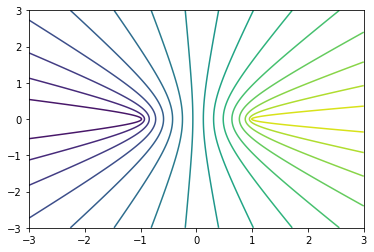

In [6]:
def wb2( z, m=1 ):
    '''
    background complex potential in z plane
    '''
    zeta = (1-(1-z**2)**.5)/z
    return m/np.pi * ( np.log(zeta-1j) - np.log(zeta+1j) )

w_b = plt.contour(x, y, wb2(z).imag, levels=17)

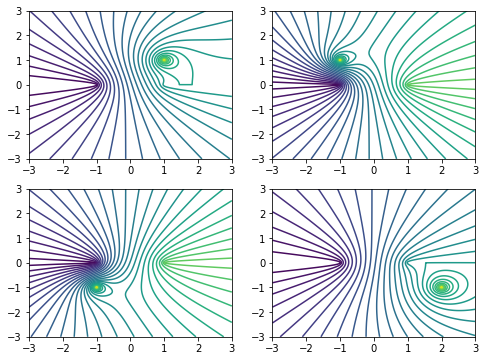

In [7]:
def w_hat( z, za, m=1, gamma=1 ):
    '''
    Total complex potential due to a point vortex + mass flux
    '''
    return w(z, za, gamma) + wb2(z, m)

fig = plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
w_hat1 = plt.contour(x, y, w_hat(z, 1+1j).imag, levels=40)
plt.subplot(2,2,2)
w_hat2 = plt.contour(x, y, w_hat(z, -1+1j).imag, levels=40)
plt.subplot(2,2,3)
w_hat3 = plt.contour(x, y, w_hat(z, -1-1j).imag, levels=40)
plt.subplot(2,2,4)
w_hat4 = plt.contour(x, y, w_hat(z, 2-1j).imag, levels=40)

# g) Changes to $h_{crit}$

The background flow term is now added to the Hamiltonian in (Eq.11), and the new Hamiltonian is now:
\begin{align}
H^{(z)}_b(z_a) &= \frac{\Gamma^2}{4\pi}log(1-|\zeta_a|^2) + \frac{\Gamma^2}{4\pi}log|\frac{2-2\zeta_a^2}{(1+\zeta_a^2)^2}| +\Gamma Im[\frac{m}{\pi}(log(\zeta_a-i)-log(\zeta_a+i))] \\
\tag{23}
\end{align}

Plot the contours of this Hamiltonian:


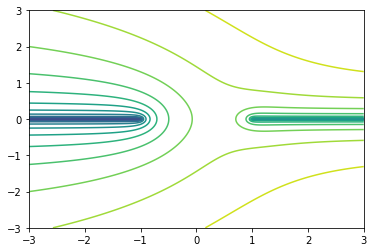

In [8]:
def Hamiltonian_b( z, gamma=1, m=.2 ):
    '''
    Hamiltonian with background flow in z-plane
    '''
    zeta = (1-(1-z**2)**.5)/z
    zeta_mol = np.abs(zeta)

    return gamma**2/4/np.pi * np.log( (1-zeta_mol**2) )+ \
           gamma**2/4/np.pi * np.log( np.abs( (2-2*zeta**2) / (1+zeta**2)**2 ) )+ \
           gamma*m/np.pi * ( np.log(zeta-1j) - np.log(zeta+1j) ).imag

H_cm02 = plt.contour(x, y, Hamiltonian_b(z, gamma=1, m=.2), levels=15)

It is easily seen from the figure above that the mass flux flow increases $h_{crit}$. This is consistent with our intuition.

If $\frac{m}{\Gamma}>>1$ the trajectories of the point vortex will tend to follow the streamlines of the mass flux flow field. In this scenario, the point vortex will always penetrate the gap regardless of its initial height, and $h_{crit}$ is undefined.

See below, when $m$ gets larger, the trajectories tend to follow the streamlines of the background flow.


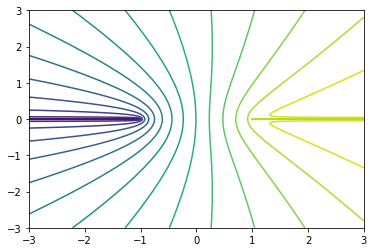

In [9]:
H_cm2 = plt.contour(x, y, Hamiltonian_b(z, gamma=1, m=2), levels=15)

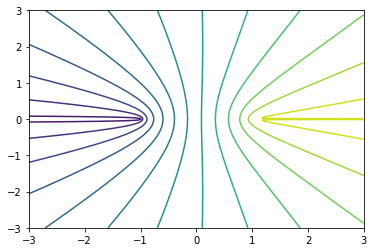

In [10]:
H_cm5 = plt.contour(x, y, Hamiltonian_b(z, gamma=1, m=5), levels=15)